# Data Mining Project

## XYZ Sports Company

**Group elements:**
* Devora Cavaleiro (20230974);
* XX (XXX);
* XX (XXX).

### Data preprocessing

#### Importing the librabries

In [6]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

#### Importing the dataset

In [7]:
df = pd.read_csv("XYZ_sports_dataset.csv", sep=";")
df

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14937,24937,14,Male,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,...,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0
14938,24938,39,Male,NaN,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,...,0.0,57.0,0,7.0,60.97,3,0,0.0,0,1
14939,24939,20,Male,1810.0,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2,...,0.0,6.0,0,7.0,30.03,8,0,0.0,0,1
14940,24940,55,Male,4800.0,2018-03-01,2018-03-01,2019-07-01,2019-12-31,2019-10-28,3,...,0.0,185.0,155,3.0,15.87,7,2,0.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [9]:
# duplicated observations (rows)
df.duplicated().sum()

0

In [10]:
df.set_index('ID', inplace=True)

#### Splitting the dataset into the metric and non-metric features

In [11]:
non_metric_features = ['Gender', 'EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodStart', 'LastPeriodFinish','DateLastVisit']
metric_features = df.columns.drop(non_metric_features).to_list()

In [12]:
# Create the variable recency with EnrollmentStart; EnrollmentFinish; --> duração do contrato --> vai ficar numerica
#LastPeriodStart; LastPeriodFinish; DateLastVisit

#### Original distributions

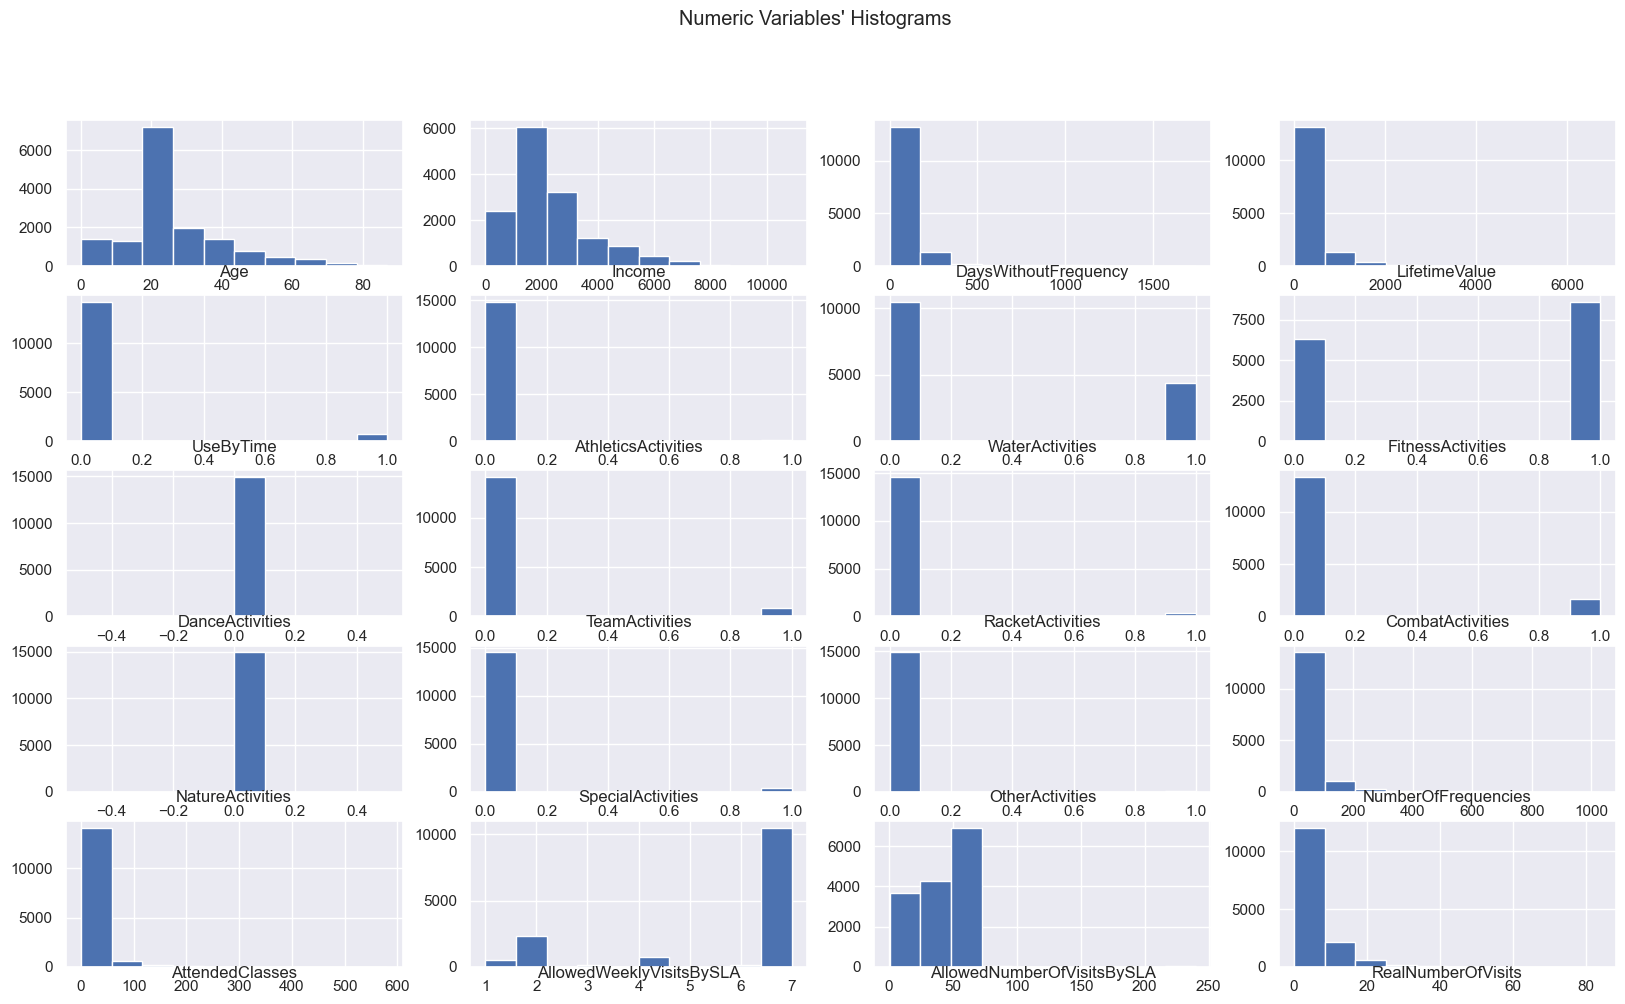

In [13]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(5, ceil(len(metric_features) / 6), figsize=(20, 11)) #number of vizualization that i want

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat]) #plot a histogram
    ax.set_title(feat, y=-0.13) #put the titule for each grafh
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title) # title for all plots

plt.show()

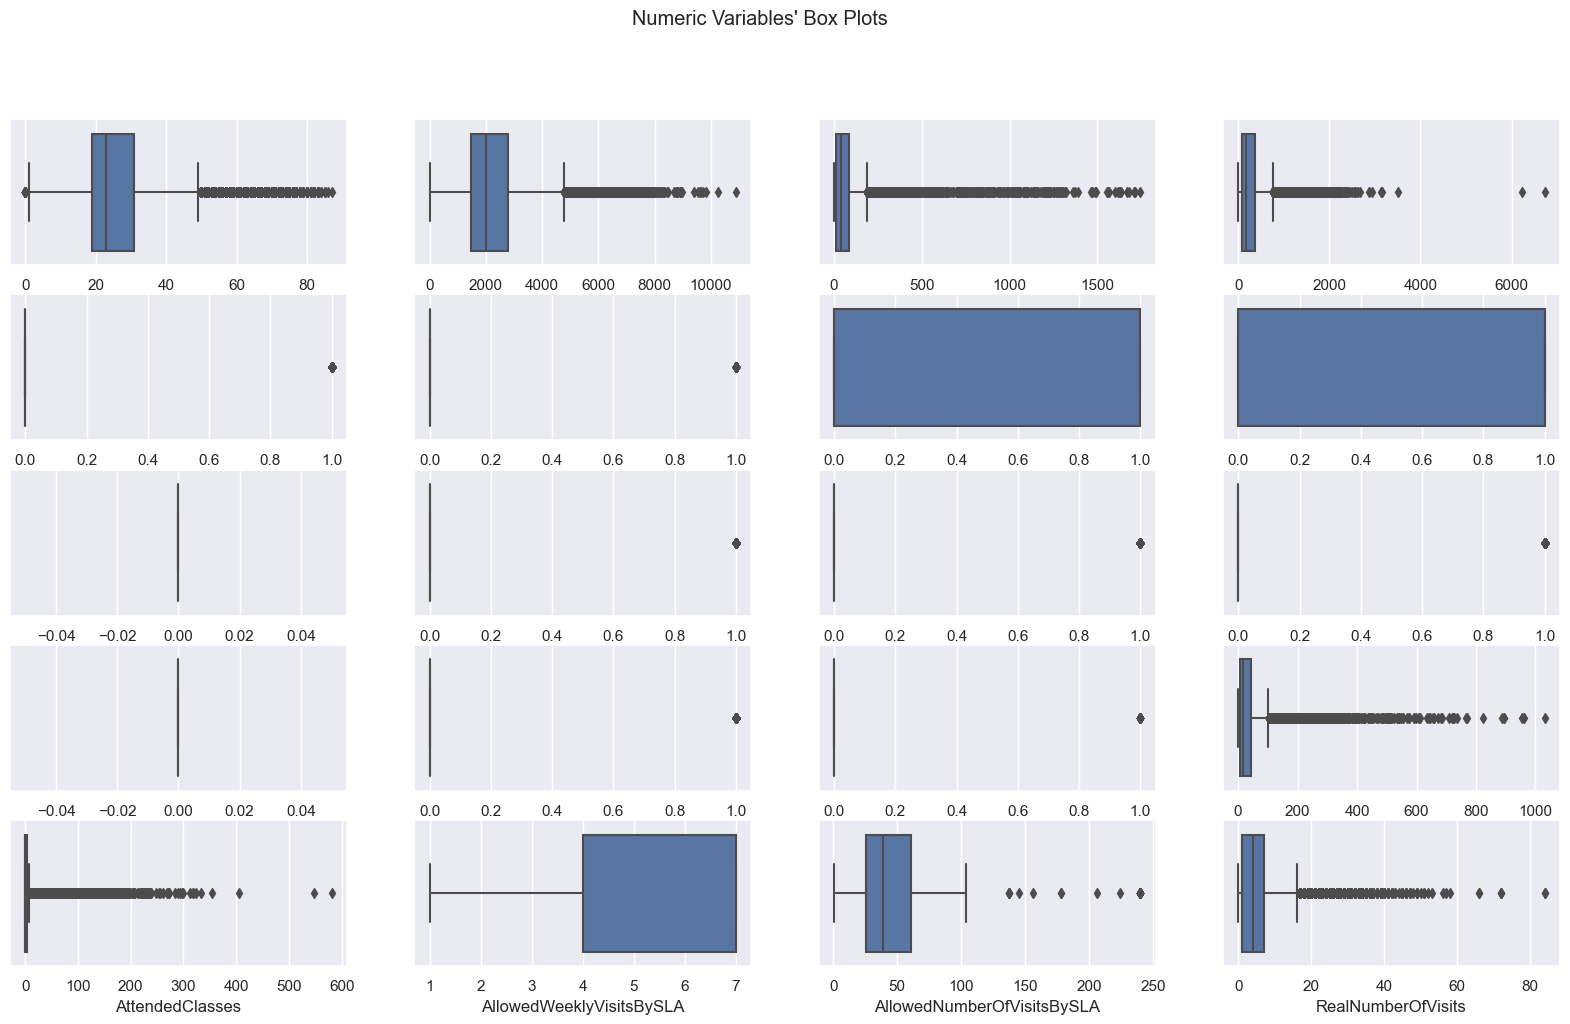

In [14]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(5, ceil(len(metric_features) / 6), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

#### Metric Variables' Correlation Matrix

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1736\1449310571.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


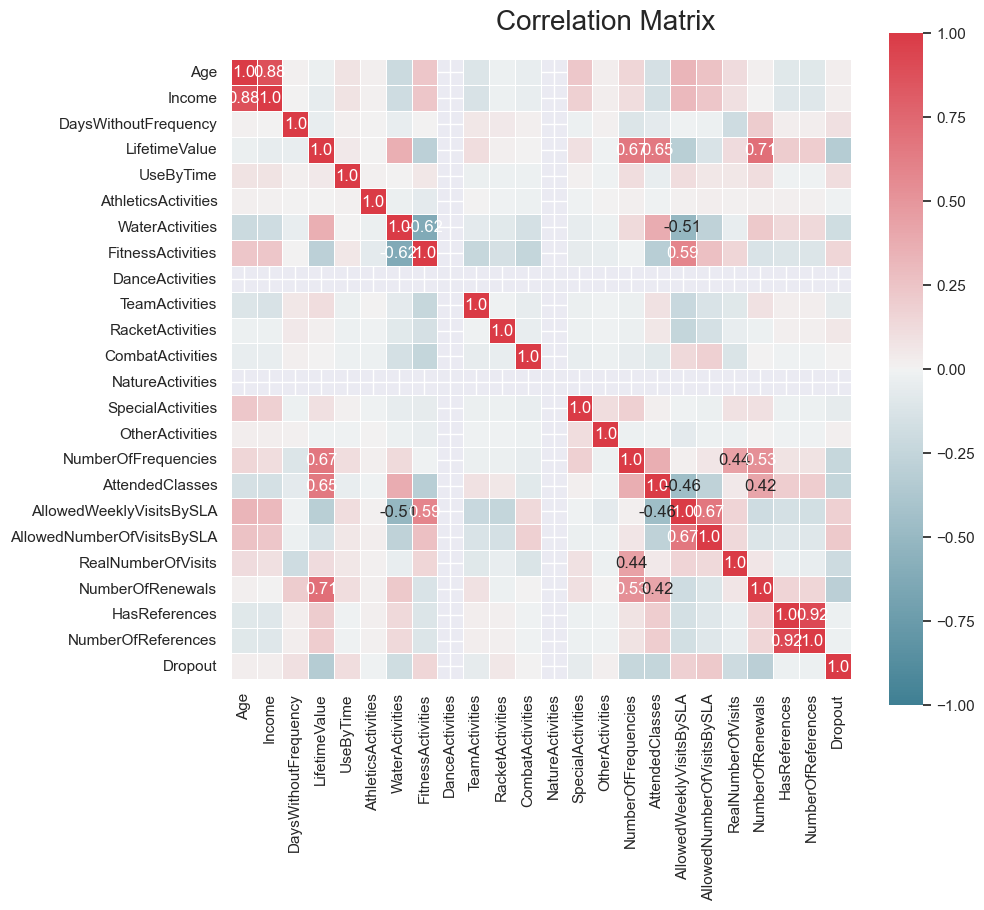

In [15]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = df.corr().round(2)

# Build annotation matrix (values above |0.4| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.4
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

* income esta relacionado com a idade (0.88)
* life time value esta relacinado com number of frequency (0.67), atended classes (0.65), number of renewals (0.71)
* water activities esta relacionado com fitness activities (0.62), allowed weekly visits by SLA (0.51)
* fitness activities esta relacionado com allowed weekly visits by SLA (0.59)
* allowed weekly visits by SLA esta relacionado com allowed number of visits by SLA (0.67)

perceber quais as atividades que as pessoas gostam mais para investir em hoarios mais alargados nessas atividades
criar coluna atividades, com os valores das frequencias das diferentes atividades

#### Missing data

In [16]:
# count of missing values
df.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout       

##### Fill missing values - Median

In [17]:
# Creating a copy to apply central tendency measures imputation
df_central = df.copy()

In [18]:
medians = df_central[metric_features].median()
medians # for metric features, median, less sensitive to outliers

Age                             23.00
Income                        1990.00
DaysWithoutFrequency            41.00
LifetimeValue                  166.20
UseByTime                        0.00
AthleticsActivities              0.00
WaterActivities                  0.00
FitnessActivities                1.00
DanceActivities                  0.00
TeamActivities                   0.00
RacketActivities                 0.00
CombatActivities                 0.00
NatureActivities                 0.00
SpecialActivities                0.00
OtherActivities                  0.00
NumberOfFrequencies             18.00
AttendedClasses                  0.00
AllowedWeeklyVisitsBySLA         7.00
AllowedNumberOfVisitsBySLA      38.99
RealNumberOfVisits               4.00
NumberOfRenewals                 1.00
HasReferences                    0.00
NumberOfReferences               0.00
Dropout                          1.00
dtype: float64

In [19]:
df_central.fillna(medians, inplace=True)
df_central

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,...,0.0,9.0,7,7.0,6.28,2,0,0.0,0,0
10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,...,0.0,41.0,0,7.0,60.97,0,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,14,Male,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,1460.45,...,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0
24938,39,Male,1990.0,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,343.85,...,0.0,57.0,0,7.0,60.97,3,0,0.0,0,1
24939,20,Male,1810.0,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2,43.60,...,0.0,6.0,0,7.0,30.03,8,0,0.0,0,1


In [20]:
## create contract_duration: EnrollmentStart; EnrollmentFinish;
# dates are not in datetime format

df_central['EnrollmentStart'] = pd.to_datetime(df_central['EnrollmentStart'])
df_central['EnrollmentFinish'] = pd.to_datetime(df_central['EnrollmentFinish'])

# Calculate the time interval
df_central['Contract'] = df_central['EnrollmentFinish'] - df_central['EnrollmentStart']

# Insert 'Contract_duration' column as the 7th column
df_central.insert(6, 'Contract_duration', df_central['Contract'])

## create ContractDurationSinceLastVisit: DateLastVisit; EnrollmentFinish;
#df_central['DateLastVisit'] = pd.to_datetime(df_central['DateLastVisit'])

# Calculate the time interval
#df_central['LastVisitToEnd'] = df_central['EnrollmentFinish'] - df_central['DateLastVisit']

# Insert 'ContractDurationSinceLastVisit' column as the 8th column
#df_central.insert(9, 'ContractDurationSinceLastVisit', df_central['LastVisitToEnd'])

# drop 'EnrollmentStart', 'EnrollmentFinish'
df_central.drop(['EnrollmentStart', 'EnrollmentFinish', 'Contract', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit'], axis=1, inplace=True)

# Display the DataFrame with the new column
df_central

,Age,Gender,Income,Contract_duration,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
10000,60,Female,5500.0,58 days,1,89.35,0,0.0,0.0,1.0,...,0.0,9.0,7,7.0,6.28,2,0,0.0,0,0
10001,29,Female,2630.0,398 days,60,479.20,0,0.0,0.0,0.0,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
10002,23,Male,1980.0,30 days,7,37.60,0,0.0,0.0,1.0,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
10003,9,Male,0.0,160 days,22,155.40,0,0.0,0.0,0.0,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
10004,35,Male,4320.0,778 days,210,373.20,0,0.0,0.0,1.0,...,0.0,41.0,0,7.0,60.97,0,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,14,Male,0.0,0 days,2,1460.45,0,0.0,1.0,0.0,...,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0
24938,39,Male,1990.0,261 days,38,343.85,0,0.0,0.0,0.0,...,0.0,57.0,0,7.0,60.97,3,0,0.0,0,1
24939,20,Male,1810.0,30 days,2,43.60,0,0.0,0.0,1.0,...,0.0,6.0,0,7.0,30.03,8,0,0.0,0,1


In [21]:
# change dtype float to int HasReferences, NumberOfFrequencies, AllowedWeeklyVisitsBySLA
dtype_list = ['Income', 'HasReferences', 'NumberOfFrequencies', 'AllowedWeeklyVisitsBySLA', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'DanceActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'NatureActivities', 'SpecialActivities', 'OtherActivities']
df_central[dtype_list] = df_central[dtype_list].astype('int64')

df_central['Gender'] = df_central['Gender'].astype('category')

In [22]:
df_central

,Age,Gender,Income,Contract_duration,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
10000,60,Female,5500,58 days,1,89.35,0,0,0,1,...,0,9,7,7,6.28,2,0,0,0,0
10001,29,Female,2630,398 days,60,479.20,0,0,0,0,...,0,23,1,2,17.42,1,2,0,0,1
10002,23,Male,1980,30 days,7,37.60,0,0,0,1,...,0,6,0,7,30.03,6,0,0,0,1
10003,9,Male,0,160 days,22,155.40,0,0,0,0,...,0,20,2,2,17.72,3,0,0,0,1
10004,35,Male,4320,778 days,210,373.20,0,0,0,1,...,0,41,0,7,60.97,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,14,Male,0,0 days,2,1460.45,0,0,1,0,...,0,112,96,4,34.84,8,3,0,0,0
24938,39,Male,1990,261 days,38,343.85,0,0,0,0,...,0,57,0,7,60.97,3,0,0,0,1
24939,20,Male,1810,30 days,2,43.60,0,0,0,1,...,0,6,0,7,30.03,8,0,0,0,1


In [23]:
df_central.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14942 entries, 10000 to 24941
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Age                         14942 non-null  int64          
 1   Gender                      14942 non-null  category       
 2   Income                      14942 non-null  int64          
 3   Contract_duration           14942 non-null  timedelta64[ns]
 4   DaysWithoutFrequency        14942 non-null  int64          
 5   LifetimeValue               14942 non-null  float64        
 6   UseByTime                   14942 non-null  int64          
 7   AthleticsActivities         14942 non-null  int64          
 8   WaterActivities             14942 non-null  int64          
 9   FitnessActivities           14942 non-null  int64          
 10  DanceActivities             14942 non-null  int64          
 11  TeamActivities              14942 non

#### Check descriptive statistics

In [24]:
df_central.describe(include="all").T
# DaysWithoutFrequency, LifetimeValue, NumberOfFrequencies, AttendedClasses have outliers

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,14942.0,NaN,NaN,NaN,26.015794,14.156582,0.0,19.0,23.0,31.0,87.0
Gender,14942,2,Female,8931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,14942.0,NaN,NaN,NaN,2222.838308,1540.962267,0.0,1490.0,1990.0,2750.0,10890.0
Contract_duration,14942,NaN,NaN,NaN,295 days 16:54:13.540356044,356 days 19:43:50.968462672,0 days 00:00:00,57 days 00:00:00,174 days 00:00:00,364 days 00:00:00,1938 days 00:00:00
DaysWithoutFrequency,14942.0,NaN,NaN,NaN,81.224936,144.199576,0.0,13.0,41.0,83.75,1745.0
LifetimeValue,14942.0,NaN,NaN,NaN,302.561871,364.319566,0.0,83.6,166.2,355.075,6727.8
UseByTime,14942.0,NaN,NaN,NaN,0.047116,0.211893,0.0,0.0,0.0,0.0,1.0
AthleticsActivities,14942.0,NaN,NaN,NaN,0.007362,0.085487,0.0,0.0,0.0,0.0,1.0
WaterActivities,14942.0,NaN,NaN,NaN,0.295476,0.456272,0.0,0.0,0.0,1.0,1.0
FitnessActivities,14942.0,NaN,NaN,NaN,0.577031,0.494047,0.0,0.0,1.0,1.0,1.0


In [25]:
# contar o numero de pessoas que participa em cada atividade
print(df['AthleticsActivities'].value_counts()[1], 'people do Athletics Activities')
print(df_central['AthleticsActivities'].value_counts()[1], 'people do Athletics Activities (after fill NaN)')

110 people do Athletics Activities
110 people do Athletics Activities (after fill NaN)


In [26]:
print(df['WaterActivities'].value_counts()[1], 'people do Water Activities')
print(df_central['WaterActivities'].value_counts()[1], 'people do Water Activities (after fill NaN)')

4415 people do Water Activities
4415 people do Water Activities (after fill NaN)


In [27]:
print(df['FitnessActivities'].value_counts()[0], 'people do Fitness Activities')
print(df_central['FitnessActivities'].value_counts()[0], 'people do Fitness Activities (after fill NaN)')

6320 people do Fitness Activities
6320 people do Fitness Activities (after fill NaN)


In [28]:
print(df['DanceActivities'].value_counts(), 'people do Dance Activities')
print(df_central['DanceActivities'].value_counts(), 'people do Dance Activities (after fill NaN)')

0.0    14906
Name: DanceActivities, dtype: int64 people do Dance Activities
0    14942
Name: DanceActivities, dtype: int64 people do Dance Activities (after fill NaN)


In [29]:
print(df['TeamActivities'].value_counts()[1], 'people do Team Activities')
print(df_central['TeamActivities'].value_counts()[1], 'people do Team Activities (after fill NaN)')

828 people do Team Activities
828 people do Team Activities (after fill NaN)


In [30]:
print(df['RacketActivities'].value_counts()[1], 'people do Racket Activities')
print(df_central['RacketActivities'].value_counts()[1], 'people do Racket Activities (after fill NaN)')

349 people do Racket Activities
349 people do Racket Activities (after fill NaN)


In [31]:
print(df['CombatActivities'].value_counts()[1], 'people do Combat Activities')
print(df_central['CombatActivities'].value_counts()[1], 'people do Combat Activities (after fill NaN)')

1609 people do Combat Activities
1609 people do Combat Activities (after fill NaN)


In [32]:
print(df['NatureActivities'].value_counts(), 'people do Nature Activities')
print(df_central['NatureActivities'].value_counts(), 'people do Nature Activities (after fill NaN)')

0.0    14895
Name: NatureActivities, dtype: int64 people do Nature Activities
0    14942
Name: NatureActivities, dtype: int64 people do Nature Activities (after fill NaN)


In [33]:
print(df['SpecialActivities'].value_counts()[1], 'people do Special Activities')
print(df_central['SpecialActivities'].value_counts()[1], 'people do Special Activities (after fill NaN)')

395 people do Special Activities
395 people do Special Activities (after fill NaN)


In [34]:
print(df['OtherActivities'].value_counts()[1], 'people do Other Activities')
print(df_central['OtherActivities'].value_counts()[1], 'people do Other Activities (after fill NaN)')

28 people do Other Activities
28 people do Other Activities (after fill NaN)


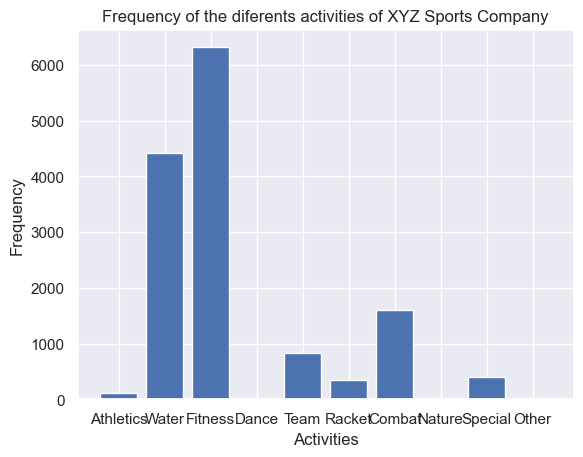

In [35]:
activities = ['Athletics', 'Water', 'Fitness', 'Dance', 'Team', 'Racket', 'Combat', 'Nature', 'Special', 'Other']
frequency = [110, 4415, 6320, 0, 828, 349, 1609, 0, 395, 28]

# Create a bar plot
plt.bar(activities, frequency)

# Add labels and title
plt.xlabel('Activities')
plt.ylabel('Frequency')
plt.title('Frequency of the diferents activities of XYZ Sports Company')

# Show the plot
plt.show()

#### Normalization

In [36]:
# normalise data except dummy variables
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and features is a list of column names you want to normalize
features = df_central[~df_central[metric_features].isin(['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'DanceActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'NatureActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences', 'Dropout'])]

scaler = MinMaxScaler()

# Fit and transform the selected features
df_centeal[features] = scaler.fit_transform(df_central[features])

TypeError: Cannot setitem on a Categorical with a new category (False), set the categories first

#### Analyse the preprocess

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = df_central.corr().round(2)

# Build annotation matrix (values above |0.4| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.4
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

##### Fill missing values - KNNImputer

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

df_neighbors = df.copy()
scaler = MinMaxScaler()

scaled_df_neighbors = pd.DataFrame(scaler.fit_transform(df_neighbors[metric_features]), 
                                   columns = df_neighbors[metric_features].columns)
imputer = KNNImputer(n_neighbors=5, weights="uniform")
scaled_df_neighbors = pd.DataFrame(imputer.fit_transform(scaled_df_neighbors), 
                            columns = df_neighbors[metric_features].columns)
scaler.inverse_transform(scaled_df_neighbors)
scaled_df_neighbors
df_neighbors = pd.DataFrame(scaler.inverse_transform(scaled_df_neighbors), 
                            columns = df_neighbors[metric_features].columns)
df_neighbors

#### Check descriptive statistics

In [ ]:
df_neighbors.describe(include="all").T

In [ ]:
# contar o numero de pessoas que participa em cada atividade
print(df['AthleticsActivities'].value_counts()[1], 'people do Athletics Activities')
print(df_neighbors['AthleticsActivities'].value_counts()[1], 'people do Athletics Activities (after fill NaN)')

In [ ]:
print(df['WaterActivities'].value_counts()[1], 'people do Water Activities')
print(df_neighbors['WaterActivities'].value_counts()[1], 'people do Water Activities (after fill NaN)')

In [ ]:
print(df['FitnessActivities'].value_counts()[0], 'people do Fitness Activities')
print(df_neighbors['FitnessActivities'].value_counts()[0], 'people do Fitness Activities (after fill NaN)')

In [ ]:
print(df['DanceActivities'].value_counts(), 'people do Dance Activities')
print(df_neighbors['DanceActivities'].value_counts(), 'people do Dance Activities (after fill NaN)')

In [ ]:
print(df['TeamActivities'].value_counts()[1], 'people do Team Activities')
print(df_neighbors['TeamActivities'].value_counts()[1], 'people do Team Activities (after fill NaN)')

In [ ]:
print(df['RacketActivities'].value_counts()[1], 'people do Racket Activities')
print(df_neighbors['RacketActivities'].value_counts()[1], 'people do Racket Activities (after fill NaN)')

In [ ]:
print(df['CombatActivities'].value_counts()[1], 'people do Combat Activities')
print(df_neighbors['CombatActivities'].value_counts()[1], 'people do Combat Activities (after fill NaN)')

In [ ]:
print(df['NatureActivities'].value_counts(), 'people do Nature Activities')
print(df_neighbors['NatureActivities'].value_counts(), 'people do Nature Activities (after fill NaN)')

In [ ]:
print(df['SpecialActivities'].value_counts()[1], 'people do Special Activities')
print(df_neighbors['SpecialActivities'].value_counts()[1], 'people do Special Activities (after fill NaN)')

In [ ]:
print(df['OtherActivities'].value_counts()[1], 'people do Other Activities')
print(df_neighbors['OtherActivities'].value_counts()[1], 'people do Other Activities (after fill NaN)')

In [ ]:
activity = ['Athletics', 'Water', 'Fitness', 'Dance', 'Team', 'Racket', 'Combat', 'Nature', 'Special', 'Other']
freq = [110, 4429, 6330, 0, 830, 350, 1611, 0, 395, 28]

# Create a bar plot
plt.bar(activity, freq)

# Add labels and title
plt.xlabel('Activities')
plt.ylabel('Frequency')
plt.title('Frequency of the diferents activities of XYZ Sports Company')

# Show the plot
plt.show()

#### Normalize

In [ ]:
# select the collumns from metric_features:


# normalise data except dummy variables

#### Analyse the preprocess

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = df_neighbors.corr().round(2)

# Build annotation matrix (values above |0.4| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.4
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

#### Outliers removal

In [ ]:
# keep if is true
#filters1 = (
#    (df["kitchen"] < 50)
#    & (df["house_keeping"] <50)
#    & (df["toys"] < 50)
#    & (df["status"] != "Whatever")
#    & (df["education"] != "OldSchool")
#)

#df_1 = df[filters1]

In [ ]:
#print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 4))

drop the columns:
* id
* NatureActivities
* DanceActivities
* age

### Clustering

#### K-Means Clustering

* **Using the elbow method to find the optimal number of clusters**

In [ ]:
# knn inputation
from sklearn.cluster import KMeans
wcss = []
X = df_neighbors[metric_features].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # atribute of kmeans that gives as the wcss of each n_clusters
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* **Training the K-Means model on the dataset**

In [ ]:
# knn imputation
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) # train the model and build the dependet variable
y_kmeans

#### Hierarchical Clustering

* **Using the dendrogram to find the optimal number of clusters**

In [ ]:
# knn imputation
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

* **Training the Hierarchical Clustering model on the dataset**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X) # train the model, and creat the dependete variable
y_hc

### Model Selection

Comment the final decision